<a href="https://colab.research.google.com/github/PrachiSinghal86/Introduction-to-Pytorch/blob/master/MNIST_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import torch
import helper
import matplotlib.pyplot as ply

In [0]:
from torchvision import datasets,transforms
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,)),])

In [5]:
trainset=datasets.MNIST('MNIST_data/',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

0it [00:00, ?it/s]

9920512it [00:01, 8140431.21it/s]                            


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 122397.96it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw


1654784it [00:00, 2214236.86it/s]                           
0it [00:00, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


8192it [00:00, 46513.16it/s]            

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


In [0]:

images, labels = next(iter(trainloader))


In [7]:
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


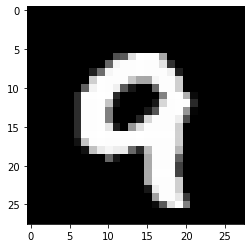

In [8]:
ply.imshow(images[8].numpy().squeeze(),cmap='Greys_r');

In [10]:
def activation(x):
  return(1/(1+torch.exp(-x)))
def sigmoid(x):
  return(torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1))
torch.manual_seed(7)
inputs=images.view(images.shape[0],-1)            #images.shape[0] gives batch size
w1=torch.randn(784,256)
w2=torch.randn(256,10)
b1=torch.randn(256)
b2=torch.randn(10)
h=activation(torch.mm(inputs,w1)+b1)
out=torch.mm(h,w2)+b2
out=sigmoid(out)
pr=torch.sum(out,dim=1)
print(out)
print(pr)

tensor([[1.3616e-11, 2.1914e-05, 3.6179e-07, 3.3851e-09, 3.7768e-06, 3.2896e-01,
         2.2822e-11, 6.7101e-01, 8.7916e-14, 3.3234e-06],
        [5.7907e-13, 3.7472e-09, 9.9255e-07, 9.8490e-06, 9.7477e-01, 2.5077e-02,
         2.2492e-09, 1.3397e-04, 5.9235e-08, 7.2467e-06],
        [1.4029e-11, 1.0269e-08, 3.6093e-01, 2.4764e-08, 6.9399e-08, 5.6270e-01,
         5.1324e-05, 2.6210e-04, 1.4454e-09, 7.6057e-02],
        [2.0196e-13, 5.7944e-03, 8.5063e-05, 3.7412e-10, 9.9031e-01, 3.3102e-03,
         1.6396e-05, 3.0408e-04, 1.9377e-07, 1.7969e-04],
        [5.0101e-13, 2.4283e-05, 7.5135e-01, 1.1098e-10, 2.4724e-01, 7.5147e-05,
         2.9855e-10, 6.8431e-06, 1.5716e-11, 1.3007e-03],
        [2.0064e-09, 1.7641e-08, 6.8793e-07, 2.9004e-09, 6.3699e-07, 9.9999e-01,
         7.2651e-08, 1.0454e-05, 6.4807e-10, 1.8442e-08],
        [1.1394e-10, 7.8469e-09, 2.5608e-04, 1.1512e-06, 6.7045e-01, 3.2928e-01,
         2.8166e-07, 2.3022e-06, 3.6697e-15, 1.6419e-05],
        [9.6198e-11, 5.8831